# Machine Learning with spaCy

In Notebook 3, we explored many of spaCy's features. Today, we're going to take a deep dive into one of its most powerful, but more complex capablities: Machine Learning. 

This notebook owes a lot to Dr. Will Mattingly's "Introduction to Machine Learning" course given at the 2021 Text Analsysis Pedagogy Institute (TAPI) given by ITHAKA. You can find [materials from Will's course on his GitHub here.](https://github.com/wjbmattingly/intro-to-ml)

Before we begin, let's make sure we have the right version of spaCy and that the model is downloaded. 

We need spaCy version 3.0 or later. Run this line of code to check your version of spaCy:

In [ ]:
!python -m spacy info

the decimal number next to "spaCy version" should start with 3. If it does not, run this line of code: 

In [ ]:
!python -m pip install --upgrade spacy

Next, we'll import our libraries and let the model download while we talk through some concepts. 

In [ ]:
import spacy
from spacy.tokens import DocBin
import csv
import random

In [ ]:
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

## What is Machine Learning?
Machine Learning is the process by which practitioners teach a computer system to perform a task, not with rules, but with statistics and linear algebra so that the system can learn from repeated (and randomized) experiences. 

Other descriptions: 
- The science and art of programming a computer to learn from data
- Giving a computer the ability to learn without being explicitly programmed
- The study of algorithms that improve performance of a task with experience

Machine learning is the opposite of rules based learning. We want the computer to make decisions - to learn - without a human making all those decisions for it.

**Rules-based** learning: when presented with x, do y. 
Example: to solve a maze, always turn right


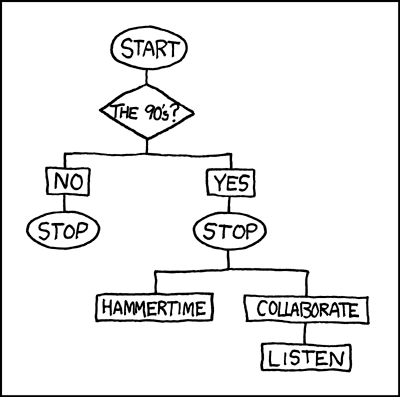


source: [xkcd, "90's Flowchart"](https://xkcd.com/210/)

**Machine** learning: look for patterns and make predictions or decisions
Example: predict house selling price, classify an email as spam, write a TV episode of Seinfeld where Seinfeld becomes a werewolf

## How does ML work?
Machines learn essentially the same way humans do. For example, when you/'re a kid, you don't know what *anything* is. As you grow up, you start observing patterns. Sometimes those decisions are helped by the adults around you, some you pick up on your own. For example, many of us learned as children how to identify a dog. 

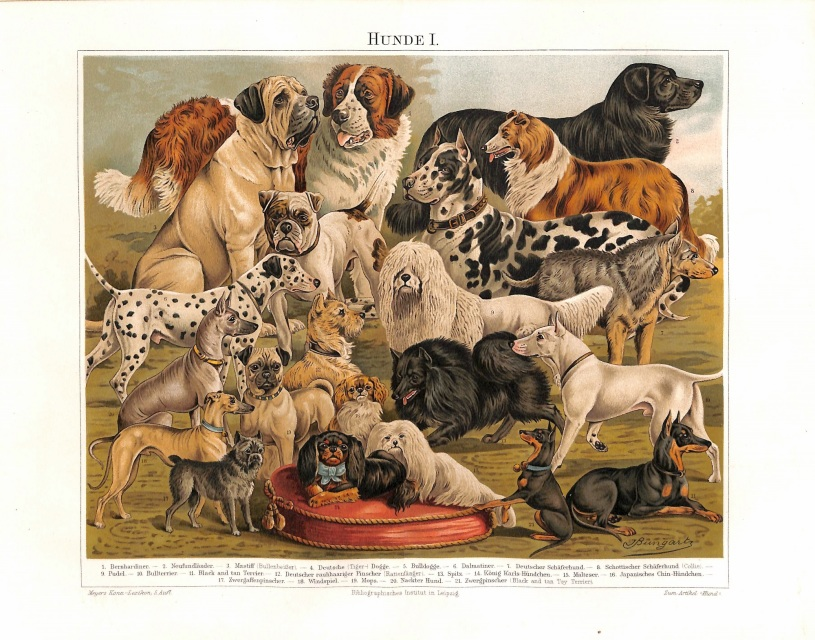

source: [ Breeds of dog from The Yuzhakov's Bolshaya Enc. (1904)](https://commons.wikimedia.org/wiki/File:Breeds_of_dog_from_The_Yuzhakov%27s_Bolshaya_Enc._(1904).jpg) From Wikimedia Commons.

There are tons of breeds of dogs, but we learned to determine what is and is not a dog. It might have started with a parent or a teacher pointing to a picture in a book and saying "dog," or we might have just been around dogs and heard the word "dog" said about them, allowing us to make the connection between the word and the creature.  

Either way, we have had enough **experiences** with dogs to determine the common **features** that dogs have: four legs, a head, back, and usually a tail, a muzzle and a nose; they make sounds like "bark" "woof" and "howl;" They pant when hot and chase balls that are thrown. 

Machines learn the same way. Using models and a lot of math (that we won't cover today), we give the computer *experiences* -- that is, data -- and it looks for *features,* also known as patterns. 

## Supervised vs Unsupervised Learning

There are two types of learning: supervised and unsupervised. **Supervised** learning asks a computer to make predicitons based on a set of training data with a *source* and a *target.*  The "supervisors" (us humans) indicate for the machines what the source and target are.  For that house price example, we would give it a dataset about houses, like this: 

| ID    | Zip Code | # beds | # baths | Sq ft | Price |
|-------|----------|--------|---------|-------|-------|
| 34553 | 48823    | 4      | 3       | 2132  | 285k  |
| 54306 | 48840    | 6      | 4       | 2630  | 339k  |
| 13457 | 48910    | 2      | 1       | 1039  | 42k   |

And ask the computer to look at the relationship between the zipcode, square footage, and number of bed and bathrooms (the **source**) and the resulting list price (the **target**).  We would then give the model a dataset with only the source data and ask it to predict the price at which each of those houses would be listed. 

In **unsupervised** learning, you give the computer a whole bunch of data without any labels or target features. This kind of learning is used in topic modelling and word vectors. Word vectors could be an entire semester on their own, but simly, the model studies a ton of text data and plots words in a giant 3-D cloud by their similarity. The example below shows the results of Ben Schmidt training a word2vec model on the Chronicling America dataset and graphing many food words based on their similarity to "vegetables" vs "meat" (x axis) and "salty" vs "sweet" (y axis). He didn't tell word2vec that lemon was saltier than tomato and less meaty than mustard--the model learned that from patterns in the text data. 


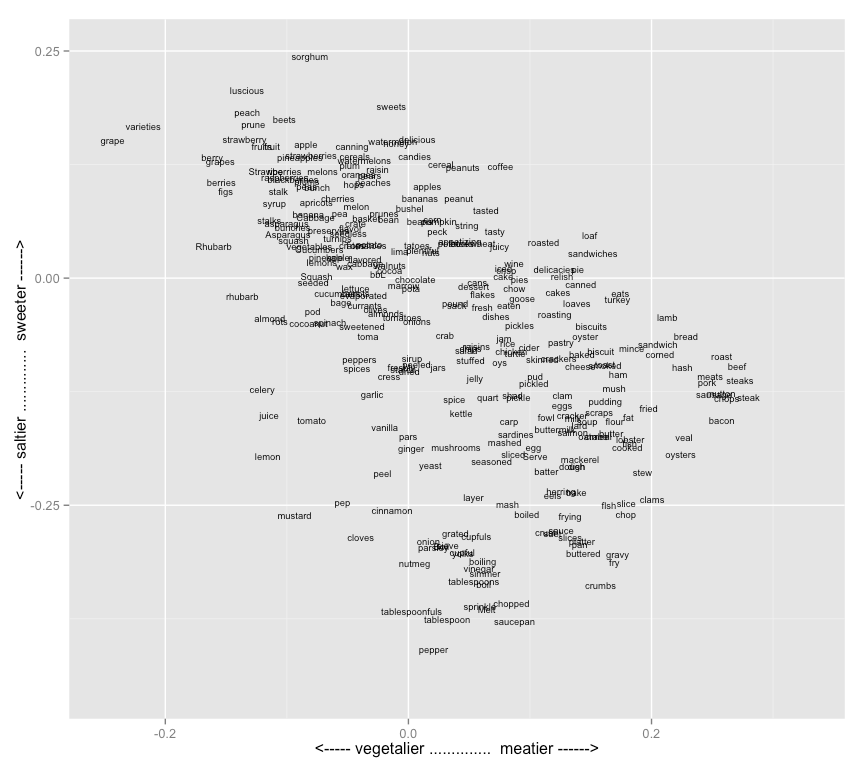
source: [Ben Schmidt, "Vector Space Models for the Digital Humanities"](http://bookworm.benschmidt.org/images/food_words_analogy-1.png)

There is also Deep learning, which involves layers of data and is generally more complex that what we'll do here. This is the kind of learning that things like DALL-E and craiyon are based on. 

## What is text classification

Text classification is a supervised learning method in which we train a model to give a pre-defined label to a text. We start with a set of texts that has already been labelled. For example, we could use a dataset of emails that have been labelled "Spam" and "Not Spam," train the model on that data, and then feed a set up unlabelled emails and see which the model labels as spam. 

This is different from topic modelling, which uses unsupervised learning to identify clusters of words (topics) for a set of documents. Text classification allows us to more explicitly specify what the model should be looking for, but it often takes more effort to set up since data usually needs to be labeled by hand.  

There are several types of text classification: 
### Binary classification
In binary classification, the training data has only two labels: 0 and 1. After training, the model will assign each text a number in between 0 and 1 to indicate which label is more appropriate. In our email example, we might give the label "not spam" a value of 0 and "Spam" a value of 1. When we put new emails through the model, it will give us the score. An email given 0.9 is very likely to be spam, but an email with a 0.4 score is probably safe but worth some caution. 

### Multiclass classification
As the name implies, multiclass classification is designed to work with more labels than two. To expand on our email example, perhaps we'd want to cateorize emails into "spam," "personal," and "work" emails to better prioritize our inbox. (So fun, I know) There can be only one label for each document in multiclass classification. 

### Multilabel classification
Multilabel classification is similar to multiclass, but more than one label can be assigned to a text. Similar to binary classification, the model will give each text a number for each label rating how closely that text fits each label.In this example, an email from your co-worker inviting you to lunch might be given a low score for spam and higher scores for work and personal.

## Goals and Data for this notebook

Today, we'll be training a model use binary classification to predict whether a text was said by Gollum or by Samwise Gamgee from the *Lord of the Rings* movie trilogy. [The dataset was created by Paul Mooney and uploaded to Kaggle.](https://www.kaggle.com/datasets/paultimothymooney/lord-of-the-rings-data) We're making use of the lotr_scripts file, which contains every line of the films, which character said the line, and which film it appears in. I have filtered the data for lines said by Sam and Gollum that are at least 5 words long. (Paul Mooney originally separated Smeagol and Gollum into two labels. Apologies to purists, but I have relabled all of Smeagol's lines as Gollum so we have more data.) 

Once we've trained our model, we will test it with some lines from the films as well as some lines from the books to see 1) how well the model works and 2) how close the language patterns of the films match the original text. 

## Preparing our data

In [ ]:
def load_data(file):
    list_of_lists = []
    with open(file, 'r',encoding="utf-8") as csvfile:
        datareader = csv.reader(csvfile)

        for row in datareader:
            list_of_lists.append([v.replace('\xa0',"") for v in row])
    return list_of_lists


In [ ]:
gollum_vs_sam = load_data('./data/lotr_scripts_SamGollum_fiveplus.csv')
print(gollum_vs_sam[20])
print(len(gollum_vs_sam))

In [ ]:
#now we want to create separate lists for gollum and sam , ensure they are equally represented in training data
gollum = [[l[1],0] for l in gollum_vs_sam if l[0]=="GOLLUM"]
sam = [[l[1],1] for l in gollum_vs_sam if l[0]=="SAM"]
# use the shuffle() function to randomize list order - don't want to base it off order in the films
random.shuffle(gollum)
random.shuffle(sam)


In [ ]:
val_gollum = gollum[:26]
val_sam = sam[:30]
val_data = val_gollum + val_sam

train_gollum = gollum[26:]
train_sam = sam[30:]
train_data = train_gollum + train_sam


In [ ]:
print(train_data[0])

In [ ]:
def make_docs(data):
    docs = []
    for doc, label in nlp.pipe(data, as_tuples=True):
        if label == 0:
            doc.cats["gollum"] = 1
            doc.cats["sam"] = 0
        else:
            doc.cats["gollum"] = 0
            doc.cats["sam"] = 1
        docs.append(doc)
    return (docs)



In [ ]:
train_docs = make_docs(train_data)
# for doc in train_docs[0:5]:
#     print(doc.cats)
print(train_docs[0].cats)

In [ ]:
train_docs = make_docs(train_data)
doc_bin = DocBin() 
for doc in train_docs:
    doc_bin.add(doc)
doc_bin.to_disk("./data/train_gs.spacy")

valid_docs = make_docs(val_data)
doc_bin = DocBin(docs=valid_docs)
doc_bin.to_disk("./data/valid_gs.spacy")

### Set up config files

In [ ]:
!python -m spacy init fill-config ./spacy-config/base_config.cfg ./spacy-config/config.cfg

### Train the model

In [ ]:
!python -m spacy train ./spacy-config/config.cfg --output ./output

In [ ]:
trained_classifier = spacy.load("output/model-best")

### Test the model
Normally, we would want to reserve some data that the model has never seen to test its accuracy--this process is called "Formal testing." Because we're working with a relatively small amount of data (and a limited time for this workshop) I didn't reserve data for this purpose. Instead, we'll do some informal testing, seeing how well the data did with lines it already saw, and then we'll try some lines from the book to see how they do. 

In [ ]:
sample_text = train_data[102]
print (sample_text)

In [ ]:
doc = trained_classifier(sample_text[0])
print (doc.cats)
print (doc)

In [ ]:
sample_text = train_data[2]
print(sample_text)
doc = trained_classifier(sample_text[0])
print (doc.cats)

In [ ]:
#Sam quote from book
s_quote = "My word, but the Gaffer would have a thing or two to say if he saw me now! Often said I'd come to a bad end, if I didn't watch my step, he did."
doc = trained_classifier(s_quote) 
print (doc.cats)

In [ ]:
#Gollum quote from book
g_quote = "Master said so. Master says: Bring us to the Gate. So good Smeagol does so. Master said so, wise master."
doc = trained_classifier(g_quote)
print (doc.cats)

In [ ]:
#Sam quote from book
s_quote = "Poor old Bill! Wolves and Snakes!  But the snakes were too much for him. I had to choose, Mr Frodo. I had to come with you. "
doc = trained_classifier(s_quote) 
print (doc.cats)

In [ ]:
#Gollum quote from book
g_quote = "Don't let Him have it. Or go away, go to nice places, and give it back to little Smeagol. Yes, yes, master give it back, eh? Smeagol will keep it safe; he will do lots of good, especially to nice hobbits."
doc = trained_classifier(g_quote)
print (doc.cats)

In [ ]:
#Gandalf quote from films
gd_quote = "I am a servant of the Secret Fire, wielder of the flame of Anor. Go back to the Shadow. The dark fire will not avail you, flame of Udun!"
doc = trained_classifier(gd_quote)
print (doc.cats)

In [ ]:
#Galadriel quote from books
gl_quote = "In place of the Dark Lord you will set up a Queen. And I shall not be dark, but beautiful and terrible as the Morning and the Night!"
doc = trained_classifier(gl_quote)
print (doc.cats)